# Project Implementation

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Load the cleaned data set
data = pd.read_csv('Data/new_autos_dropped.csv', sep=',',encoding='ISO-8859-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202407 entries, 0 to 202406
Data columns (total 11 columns):
Unnamed: 0      202407 non-null int64
price           202407 non-null int64
vehicle_type    202407 non-null object
gearbox         202407 non-null object
power_ps        202407 non-null int64
model           202407 non-null object
kilometer       202407 non-null int64
fuel_type       202407 non-null object
brand           202407 non-null object
postal_code     202407 non-null int64
vehicleAge      202407 non-null int64
dtypes: int64(6), object(5)
memory usage: 17.0+ MB


In [4]:
data.describe()

,Unnamed: 0,price,power_ps,kilometer,postal_code,vehicleAge
count,202407.000000,202407.000000,202407.000000,202407.000000,202407.000000,202407.000000
mean,185495.880434,7410.770166,132.414432,121650.387585,52315.878389,177.972264
std,107322.315616,7522.448146,59.956473,40519.626154,25751.456935,58.471704
min,3.000000,600.000000,30.000000,5000.000000,1067.000000,51.000000
25%,92370.500000,2200.000000,90.000000,90000.000000,31832.000000,132.000000
50%,185319.000000,4900.000000,122.000000,150000.000000,51570.000000,177.000000
75%,278578.500000,9900.000000,163.000000,150000.000000,73240.000000,224.000000
max,371527.000000,60000.000000,500.000000,150000.000000,99998.000000,303.000000


In [5]:
data.head()

,Unnamed: 0,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,postal_code,vehicleAge
0,3,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,91074,225
1,4,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,60437,140
2,6,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,67112,187
3,10,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,96224,183
4,14,17999,suv,manuell,190,navara,70000,diesel,nissan,4177,108


In [6]:
#Dropping Columns "Unnamed:0" and "postal_code"
data = data.drop('Unnamed: 0',1)
data = data.drop('postal_code',1)

In [7]:
#Making a copy the dataframe
new_autos = data.copy()

In [8]:
new_autos.describe()

,price,power_ps,kilometer,vehicleAge
count,202407.000000,202407.000000,202407.000000,202407.000000
mean,7410.770166,132.414432,121650.387585,177.972264
std,7522.448146,59.956473,40519.626154,58.471704
min,600.000000,30.000000,5000.000000,51.000000
25%,2200.000000,90.000000,90000.000000,132.000000
50%,4900.000000,122.000000,150000.000000,177.000000
75%,9900.000000,163.000000,150000.000000,224.000000
max,60000.000000,500.000000,150000.000000,303.000000


In [9]:
data.head()

,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,vehicleAge
0,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,225
1,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,140
2,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,187
3,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,183
4,17999,suv,manuell,190,navara,70000,diesel,nissan,108


In [10]:
#Encoding the columns with character data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat = new_autos.columns[new_autos.dtypes==object]
for col in cat:
    new_autos[col]= le.fit_transform(new_autos[col])
new_autos.head()

,price,vehicle_type,gearbox,power_ps,model,kilometer,fuel_type,brand,vehicleAge
0,1500,3,1,75,116,150000,0,37,225
1,3600,3,1,69,101,90000,2,31,140
2,2200,1,1,109,7,150000,0,25,187
3,2000,5,1,105,9,150000,0,19,183
4,17999,6,1,190,159,70000,2,23,108


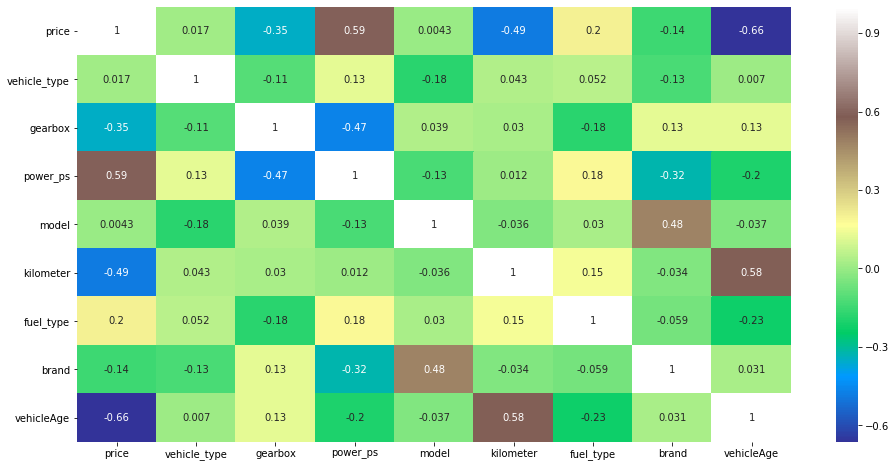

In [11]:
#Plot the heatmap for visualizing the correlation between attributes
plt.figure(figsize=(16,8))
sns.heatmap(new_autos.corr(), annot=True,cmap="terrain", )
plt.show()

In [12]:
sample_data = new_autos.sample(frac=0.01, replace=True)
y=sample_data['price']
X=sample_data.drop(['price'], axis=1)
X.shape, y.shape

((2024, 8), (2024,))

In [13]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV
def gridsearchcv(model,parameters):
    gsCV = GridSearchCV(model,parameters,n_jobs=-1, verbose=1)  
    return gsCV  

In [14]:
#GridSearchCV 
from sklearn.model_selection import GridSearchCV
gsCV_model = RandomForestRegressor(oob_score=True)
tuned_parameters = {'n_estimators': [200],
                    'max_features':[2,4,8, 'auto'],
                    'max_depth':[10,20],
                    'min_samples_split':[2,3,4,],
                    'min_samples_leaf':[1,2,3]}
gsCV = gridsearchcv(gsCV_model, tuned_parameters)  
gsCV.fit(X,y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Users/madhubandru/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 20],
      

In [15]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.8090566583531204
{'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [16]:
from collections import OrderedDict
from sklearn.datasets import make_classification
ensemble_clfs = [("RandomForestRegressor, max_depth='20', min_samples_split='3', min_samples_leaf='1'",
                  RandomForestRegressor(warm_start=True, max_features=4, max_depth=20, min_samples_split=3, min_samples_leaf=1,oob_score=True))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)


min_estimators = 30
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 50):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

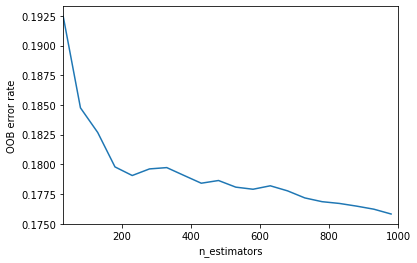

In [17]:
# Generating "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

### Build train and test data

In [18]:
X=new_autos.drop(['price'], axis=1)
y=new_autos['price']

In [19]:
#splitting to test and train set..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#format
X_train.shape,y_train.shape,X_test.shape, y_test.shape

((161925, 8), (161925,), (40482, 8), (40482,))

## Linear Regression

In [20]:
#X_train, X_test, y_train, y_test
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Linear_pred = linear_model.predict(X_test)

In [22]:
print("Linear Regression Mean Absolute Error:")
print(mean_absolute_error(y_test, Linear_pred))
print("Linear Regression Accuracy:")
print(linear_model.score(X_test, y_test))

Linear Regression Mean Absolute Error:
2794.0718998665698
Linear Regression Accuracy:
0.7097253936469061


In [23]:
test = new_autos[new_autos['brand']==31] #31 = skoda
sample_test = test.sample(frac=0.006, replace=True)
y_tp=sample_test['price']
X_tp=sample_test.drop(['price'], axis=1)
x_input = range(X_tp.shape[0])

In [24]:
X_tp.shape, y_tp.shape

((24, 8), (24,))

#### Plot Real Price vs Estimated Price

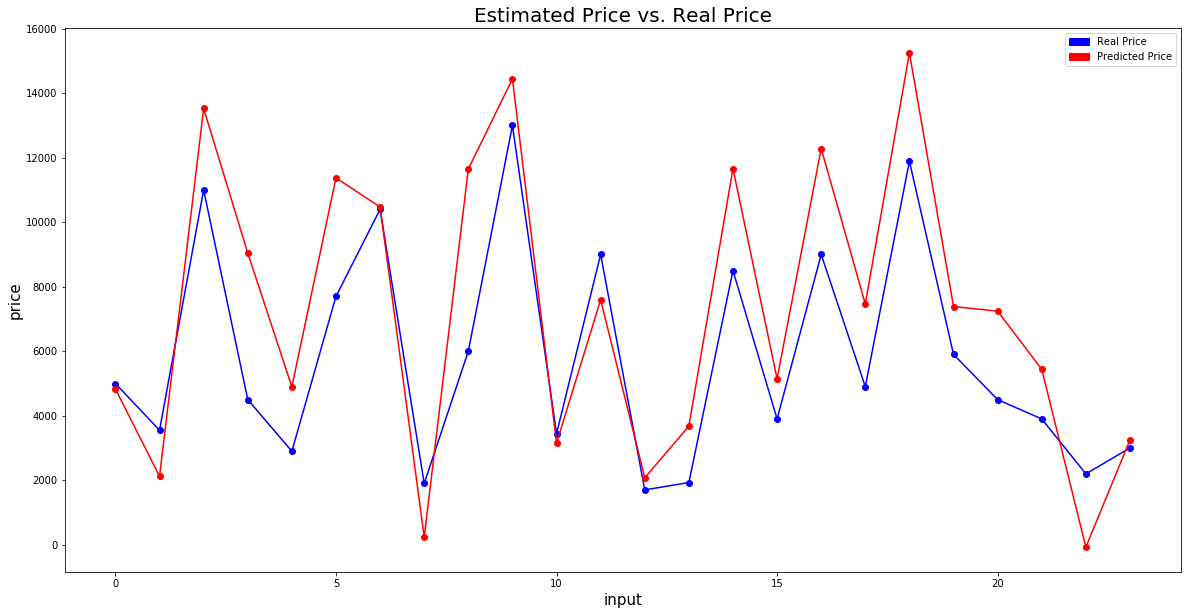

In [25]:
lin_pred= linear_model.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,lin_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## K-Nearest Neighbors

In [26]:
#GridSearchCV 
KNCV_model = KNeighborsRegressor()
tuned_parameters = {'n_neighbors': [3,5,11,19],
                    'weights':['uniform'],
                    'metric':['euclidean','manhattan']}


In [27]:
gsCV = gridsearchcv(KNCV_model,tuned_parameters)
gsCV.fit(X,y)

/Users/madhubandru/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  4.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [28]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.8917606815425574
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [29]:
neigh = KNeighborsRegressor(n_neighbors=2, weights = 'uniform')
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [30]:
knn_pred = neigh.predict(X_test)

In [31]:
print("KNN Mean Absolute Error:")
print(mean_absolute_error(y_test, knn_pred))
print("KNN Accuracy:")
print(neigh.score(X_test,y_test))

KNN Mean Absolute Error:
1407.0197865718096
KNN Accuracy:
0.8803251282750931


#### Plot Real Price vs Estimated Price

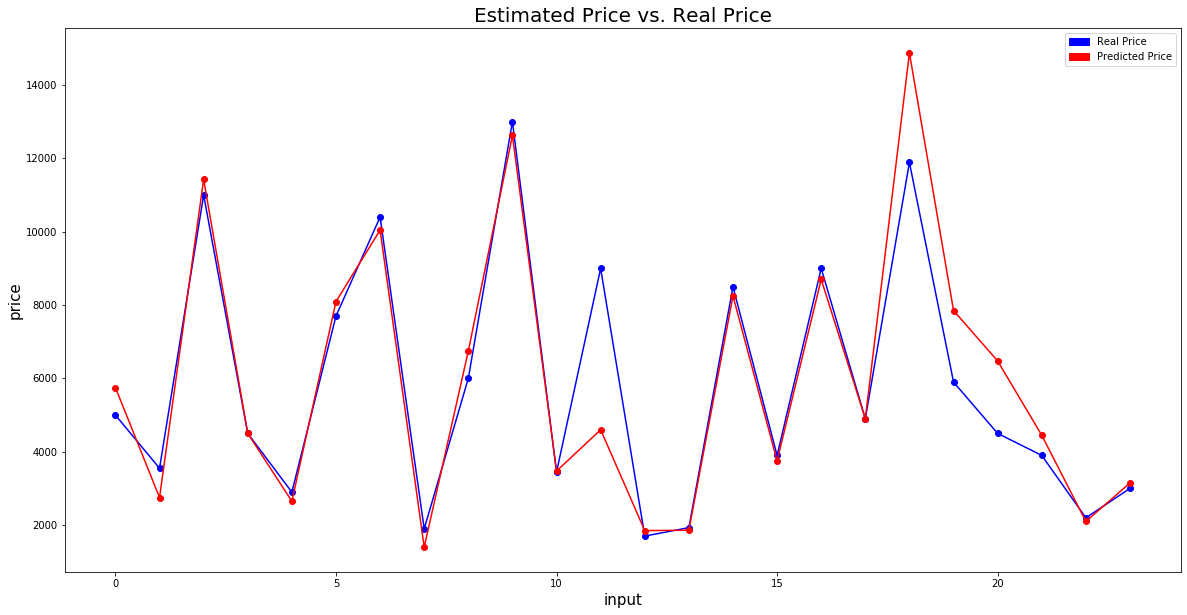

In [32]:
knnei_pred= neigh.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,knnei_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## Neural networks

In [33]:
nn_model = MLPRegressor(hidden_layer_sizes=(128,), # Pretty much a random value here to start playing with
                        max_iter=150, # Some base line
                        verbose=True, # Well, I am just too eager :)
                        random_state=42, # We want repeatable experiments
                        alpha=0.7 #  No regularization by default... IF we have overfitting, then we will look into it
                       )
nn_model.fit(X_train, y_train)

Iteration 1, loss = 36500206.95498837
Iteration 2, loss = 26458377.47944845
Iteration 3, loss = 16566085.51989227
Iteration 4, loss = 12454708.99409795
Iteration 5, loss = 11776386.34399125
Iteration 6, loss = 11603402.69697665
Iteration 7, loss = 11545259.89649157
Iteration 8, loss = 11496104.53054365
Iteration 9, loss = 11441440.00170438
Iteration 10, loss = 11439531.93491812
Iteration 11, loss = 11392374.58356526
Iteration 12, loss = 11384903.22640860
Iteration 13, loss = 11315284.66477865
Iteration 14, loss = 11324719.28680527
Iteration 15, loss = 11264868.69707605
Iteration 16, loss = 11258827.63443040
Iteration 17, loss = 11197773.26698608
Iteration 18, loss = 11182885.13071269
Iteration 19, loss = 11232097.28355680
Iteration 20, loss = 11196709.85890572
Iteration 21, loss = 11117323.38602265
Iteration 22, loss = 11164286.33749209
Iteration 23, loss = 11056473.77334794
Iteration 24, loss = 11109006.80894049
Iteration 25, loss = 11078608.39258710
Iteration 26, loss = 10999206.6832

/Users/madhubandru/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.7, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(128,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=150, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [34]:
nn_pred = nn_model.predict(X_test)

In [35]:
print("Neural Network Mean Absolute Error:")
print(mean_absolute_error(y_test, nn_pred))
print("Neural Network Accuracy:")
print(nn_model.score(X_test, y_test))

Neural Network Mean Absolute Error:
2539.425552921505
Neural Network Accuracy:
0.7270398449819782


#### Plot Real Price vs Estimated Price

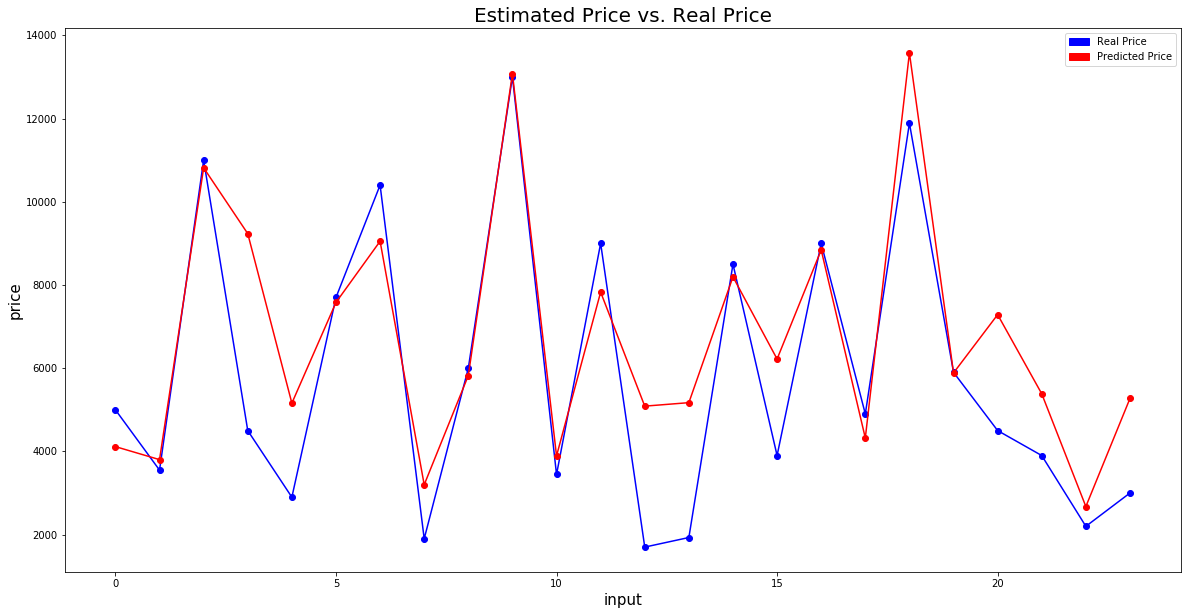

In [36]:
nni_pred= nn_model.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,nni_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## Decision Tree

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=1))

In [38]:
gsCV = gridsearchcv(pipe_tree, param_grid)

In [39]:
gsCV.fit(X,y)


/Users/madhubandru/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeregressor',
                                        DecisionTreeRegressor(criterion='mse',
                                                              max_depth=None,
                                                              max_features=None,
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,
                                                              presort=False,
  

In [40]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.8989424387150268
{'decisiontreeregressor__max_depth': 18, 'decisiontreeregressor__min_samples_leaf': 5}


In [41]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
Decision_pred= regr_1.predict(X_test)

In [43]:
print("Decision Tree Mean Absolute Error:")
print(mean_absolute_error(y_test, Decision_pred))
print("Decision Tree  Accuracy:")
print(regr_1.score(X_test,y_test))

Decision Tree Mean Absolute Error:
1597.172443695518
Decision Tree  Accuracy:
0.8733483171005704


#### Plot Real Price vs Estimated Price

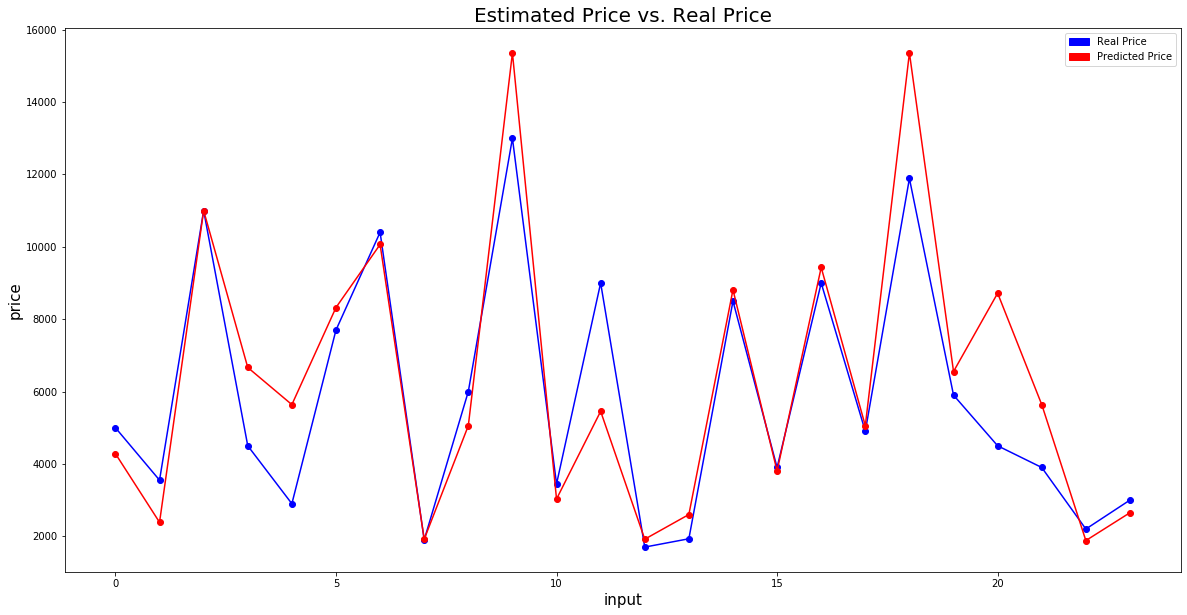

In [44]:
dec_pred= regr_1.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,dec_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

## Random Forest

In [45]:
model=RandomForestRegressor(max_features = 4, max_depth= 20, min_samples_leaf= 1, oob_score=True,
                            min_samples_split= 3, n_estimators= 500,
                            n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [46]:
forest_pred= model.predict(X_test)

In [47]:
print("Random Forest Mean Absolute Error:")
print(mean_absolute_error(y_test, forest_pred))
print("Random Forest Accuracy:")
print(model.score(X_test,y_test))

Random Forest Mean Absolute Error:
1105.8964625009746
Random Forest Accuracy:
0.9329816693133461


#### Plot Real Price vs Estimated Price

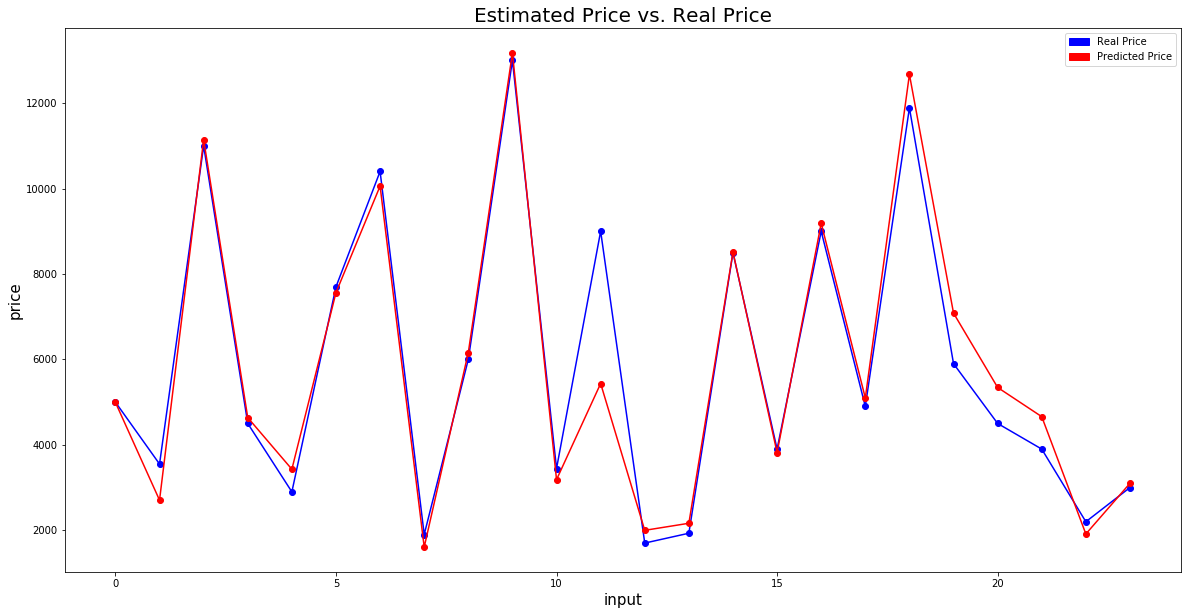

In [48]:
rf_pred= model.predict(X_tp)
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)

plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,rf_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price')

plt.legend(handles=[blue_patch,red_patch])
plt.show()

#### Comparision between all above models

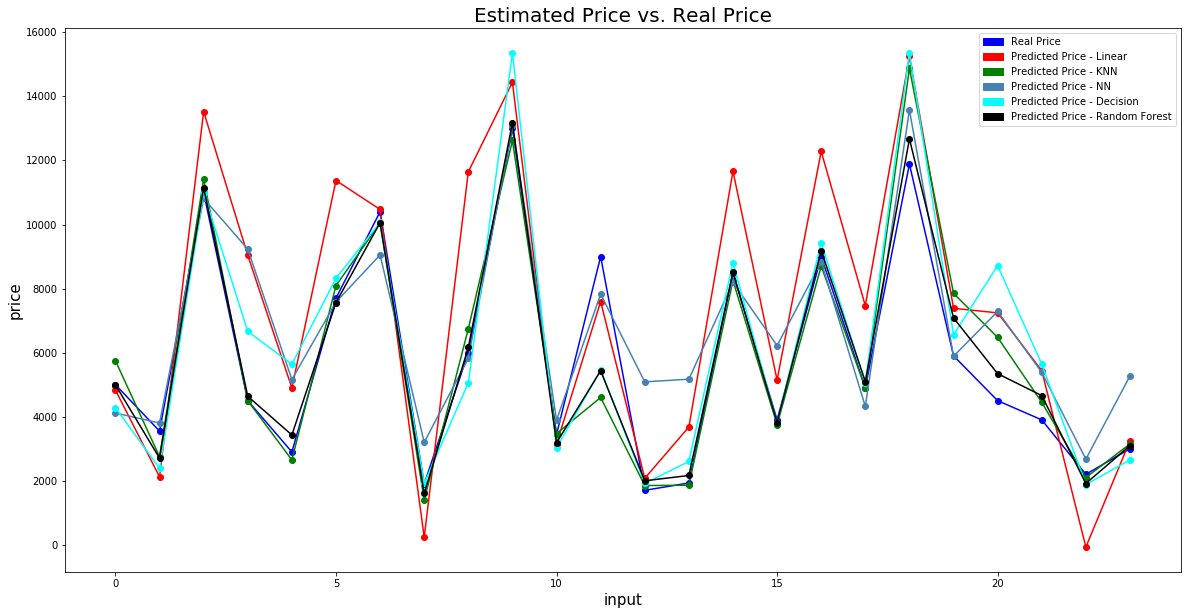

In [49]:
fig = plt.figure(figsize=(20,10))
plt.title("Estimated Price vs. Real Price",fontsize=20)
plt.xlabel("input", fontsize=15)
plt.ylabel("price", fontsize=15)
plt.plot(x_input,y_tp,marker='o',color='blue')
blue_patch = mpatches.Patch(color='blue', label= 'Real Price')

plt.plot(x_input,lin_pred,marker='o',color='red')
red_patch = mpatches.Patch(color='red', label= 'Predicted Price - Linear')

plt.plot(x_input,knnei_pred,marker='o',color='green')
green_patch = mpatches.Patch(color='green', label= 'Predicted Price - KNN')

plt.plot(x_input,nni_pred,marker='o',color='steelblue')
steelblue_patch = mpatches.Patch(color='steelblue', label= 'Predicted Price - NN')

plt.plot(x_input,dec_pred,marker='o',color='cyan')
cyan_patch = mpatches.Patch(color='cyan', label= 'Predicted Price - Decision')

plt.plot(x_input,rf_pred,marker='o',color='black')
black_patch = mpatches.Patch(color='black', label= 'Predicted Price - Random Forest')

plt.legend(handles=[blue_patch,red_patch,green_patch,steelblue_patch,cyan_patch,black_patch])
plt.show()

### Important features

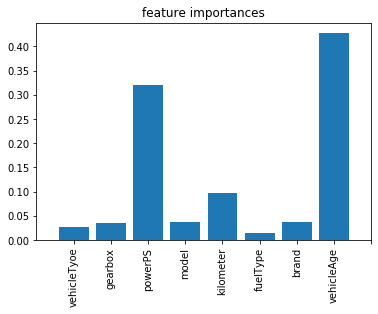

In [50]:
plt.figure()
plt.title("feature importances")
plt.bar(range(X.shape[1]), model.feature_importances_, align="center")
plt.xticks(range(9), ('vehicleType', 'gearbox', 'powerPS', 'model', 'kilometer', 'fuelType', 'brand', 'vehicleAge'), rotation=90 )
plt.xlim([-1, X.shape[1]])
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
Regressors = [("linear_regression", linear_model),
               ("Kneighbor", neigh), 
               ("MLP Regressor", nn_model), 
               ("Decision Tree", regr_1), 
               ("Random Forest", model)]

 

for name, regressor in Regressors:
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

 

    print("For "+ name +", mean square error and mean absolute error were:")
    print(sqrt(mean_squared_error(y_test,predictions)))
    print(mean_absolute_error(y_test,predictions))
    print("")

For linear_regression, mean square error and mean absolute error were:
4081.1855769513368
2794.0718998665698

For Kneighbor, mean square error and mean absolute error were:
2620.4948233164305
1407.0197865718096

Iteration 1, loss = 36500206.95498837
Iteration 2, loss = 26458377.47944845
Iteration 3, loss = 16566085.51989227
Iteration 4, loss = 12454708.99409795
Iteration 5, loss = 11776386.34399125
Iteration 6, loss = 11603402.69697665
Iteration 7, loss = 11545259.89649157
Iteration 8, loss = 11496104.53054365
Iteration 9, loss = 11441440.00170438
Iteration 10, loss = 11439531.93491812
Iteration 11, loss = 11392374.58356526
Iteration 12, loss = 11384903.22640860
Iteration 13, loss = 11315284.66477865
Iteration 14, loss = 11324719.28680527
Iteration 15, loss = 11264868.69707605
Iteration 16, loss = 11258827.63443040
Iteration 17, loss = 11197773.26698608
Iteration 18, loss = 11182885.13071269
Iteration 19, loss = 11232097.28355680
Iteration 20, loss = 11196709.85890572
Iteration 21, los

/Users/madhubandru/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


For Decision Tree, mean square error and mean absolute error were:
2689.1949190542646
1596.367819888858

For Random Forest, mean square error and mean absolute error were:
1960.9231923916695
1106.0267924287195

